# Import Library

In [1]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

Install Kaggle

In [2]:
!pip install kaggle

In [3]:
cred = {"username":"xxxx","key":"xxxx"}

In [4]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 1.57MB/s]


In [6]:
! unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [7]:
cols = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines']
df = pd.read_csv('../content/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.shape

(2240, 29)

# Exploratory Data Analysis

Berdasarkan data yang dimiliki, dapat diketahui bahwa terdapat 24 data kosong pada kolom Income. Maka dari itu akan dilakukan pengisian data menggunakan Mean Imputation

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df['Year_Birth'].value_counts().head(5)

1976    89
1971    87
1975    83
1972    79
1978    77
Name: Year_Birth, dtype: int64

In [13]:
df['Education'].value_counts().head(5)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
df['Marital_Status'].value_counts().head()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [15]:
df['Kidhome'].value_counts().head(5)

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [16]:
df['Teenhome'].value_counts().head(5)

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

#Data Visualization

Visualisasi data jumlah manusia per tahun lahir

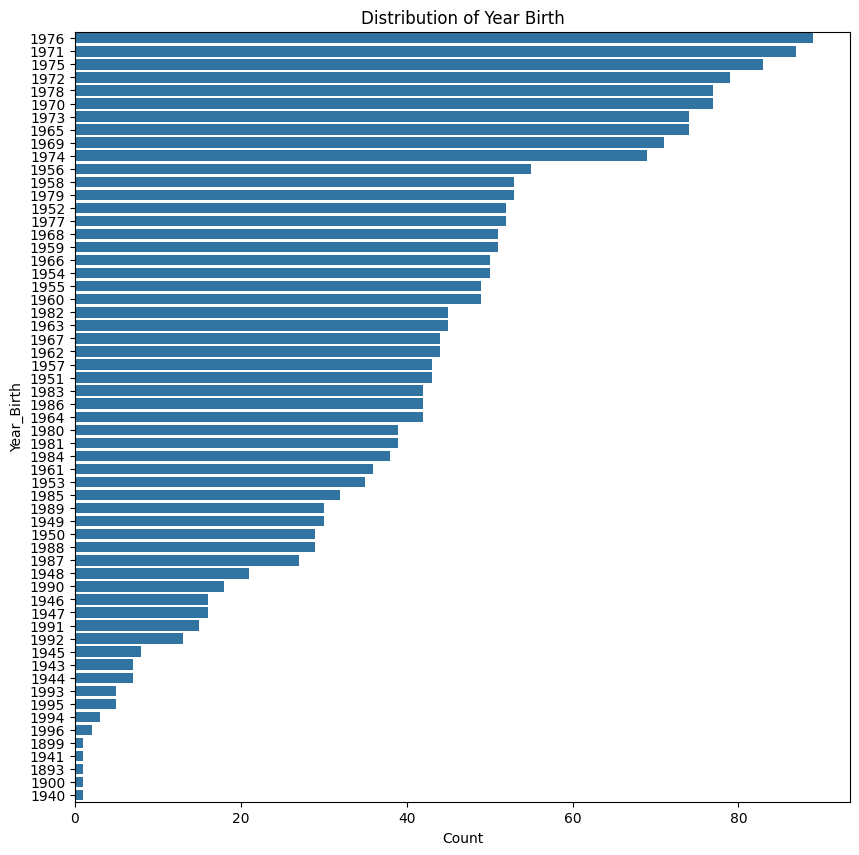

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 1, 1)
sns.countplot(y='Year_Birth', data=df, order=df['Year_Birth'].value_counts().index)
plt.title('Distribution of Year Birth')
plt.xlabel('Count')
plt.ylabel('Year_Birth')

plt.show()

Visualisasi persebaran data terhadap tahun lahir dan pemasukan

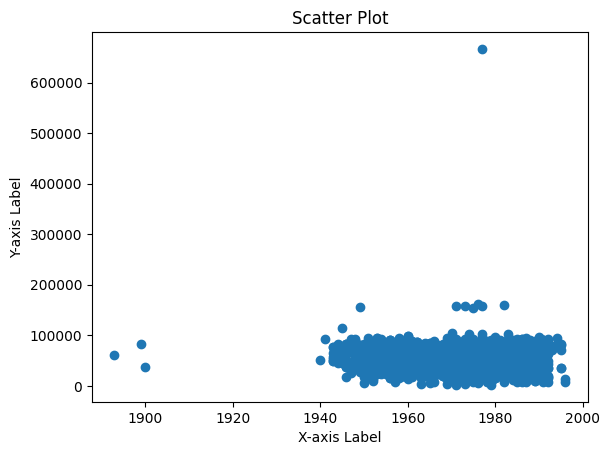

In [18]:
plt.scatter(df['Year_Birth'],df['Income'])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot')

# Show plot
plt.show()

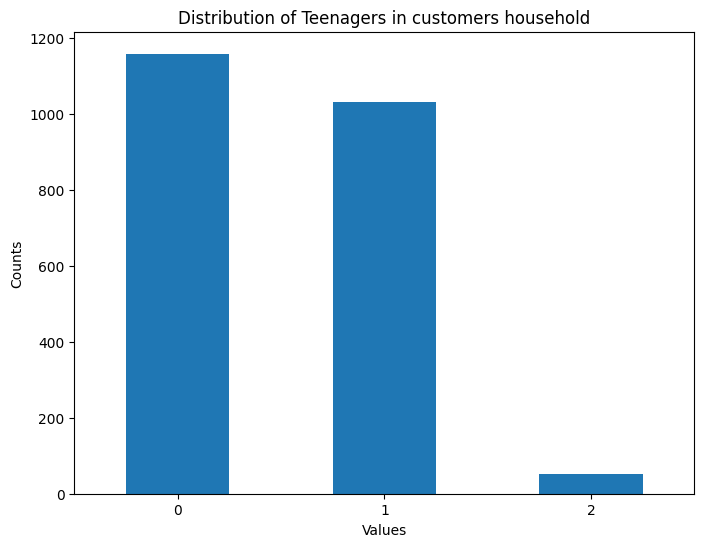

In [19]:
teenHome_counts = df['Teenhome'].value_counts().head(5)

# Create the bar plot
plt.figure(figsize=(8, 6))
teenHome_counts.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of Teenagers in customers household')
plt.xticks(rotation=0)
plt.show()

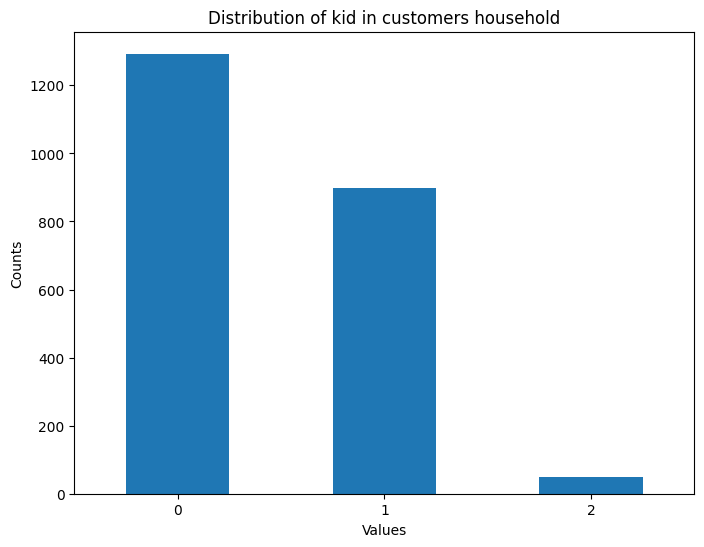

In [20]:
kidHome_counts = df['Kidhome'].value_counts().head(5)

# Create the bar plot
plt.figure(figsize=(8, 6))
kidHome_counts.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Distribution of kid in customers household')
plt.xticks(rotation=0)
plt.show()

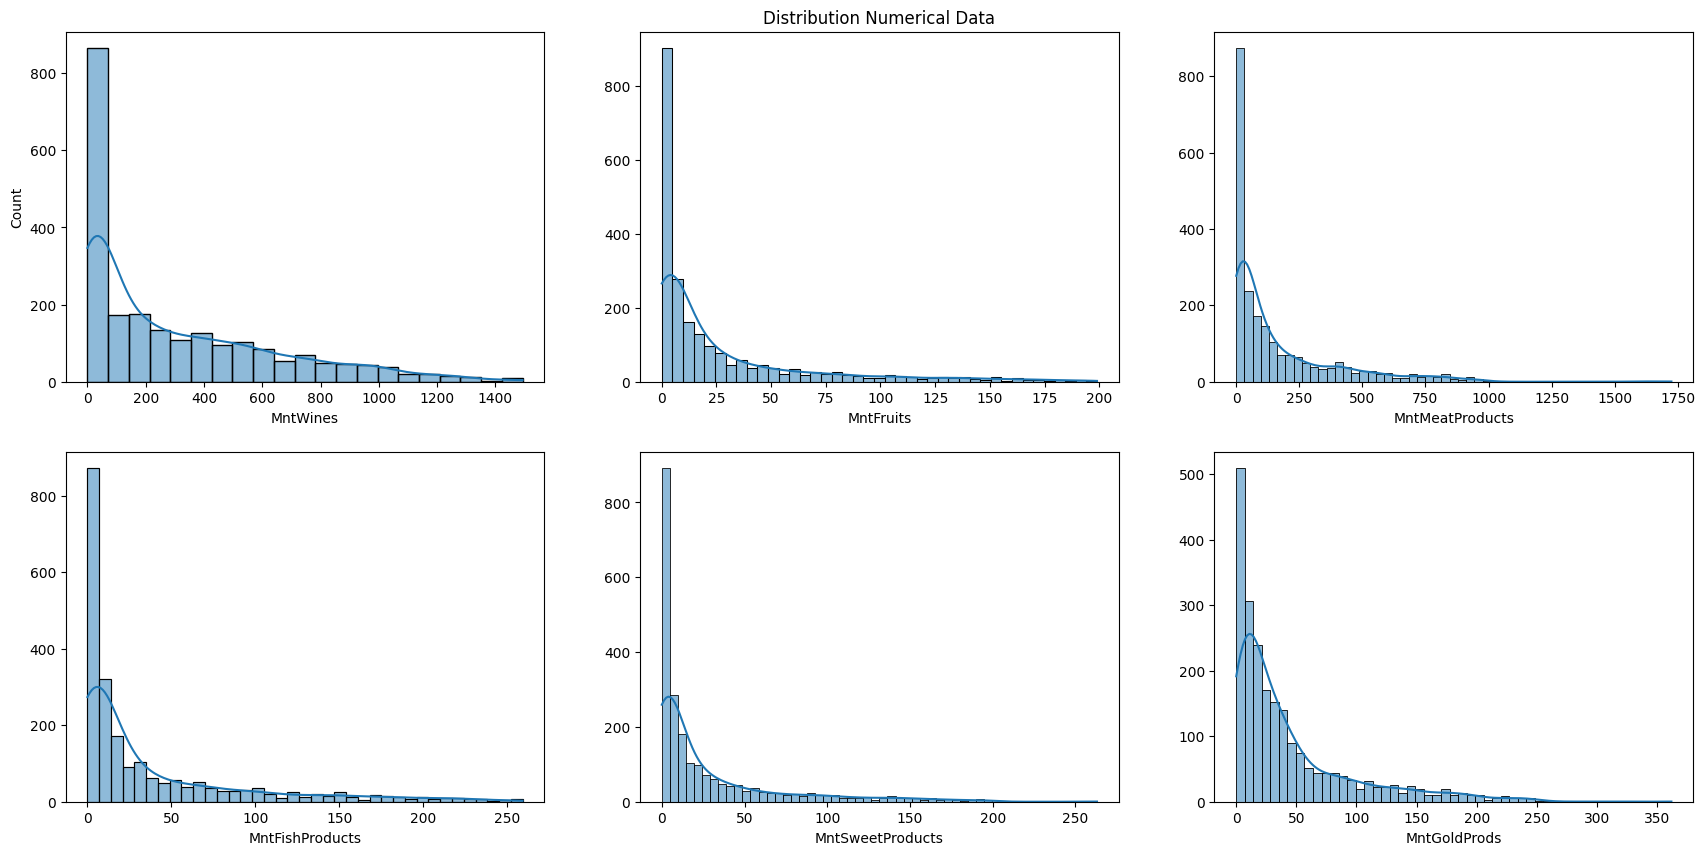

In [21]:
plt.figure(figsize = (21, 10))
n = 0
for cols in ['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    n += 1
    plt.subplot(2 , 3 , n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count' if n == 1 else '')
    plt.title('Distribution Numerical Data' if n == 2 else '')
plt.show()

Menghapus ID karena tidak digunakan

In [22]:
cols = list(df.columns)
cols.remove('ID')
print(cols)

['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


Mencari data outlier

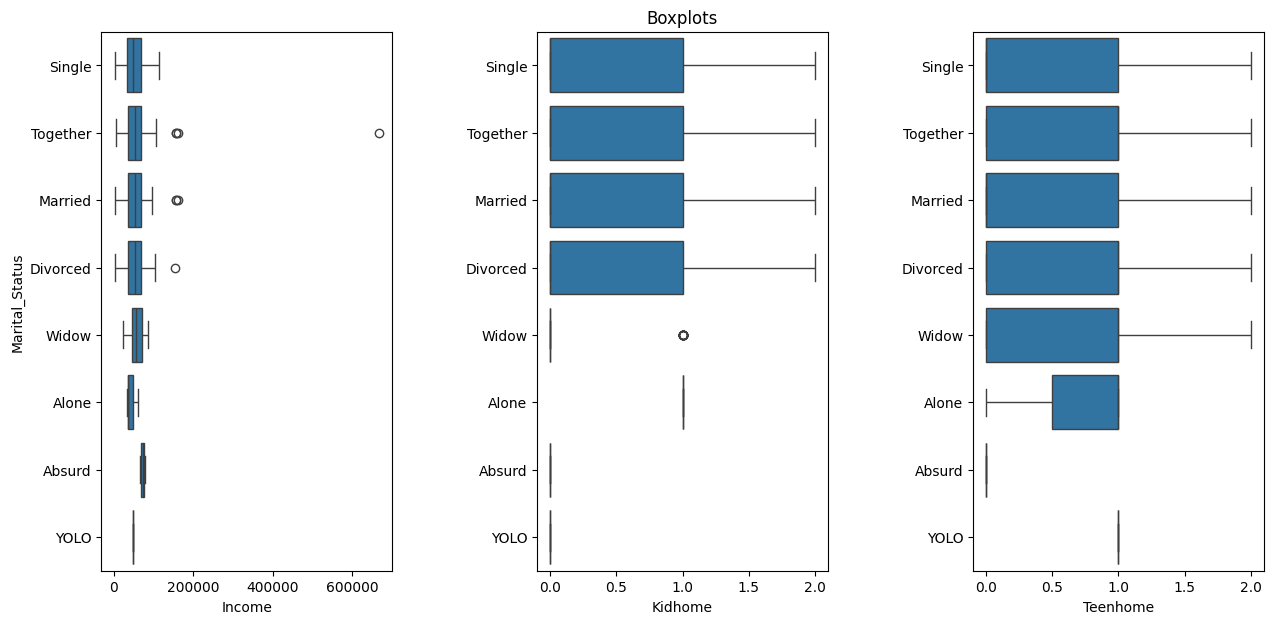

In [23]:
plt.figure(figsize = (15 ,7))
n = 0
for cols in ['Income','Kidhome','Teenhome']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Marital_Status' , data = df)
    plt.ylabel('Marital_Status' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

Menghapus data outlier dengan nilai income sebesar 666666

In [24]:
df = df[df['Income'] != 666666]
print([df[df['Income'] == 666666]])

[Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]]


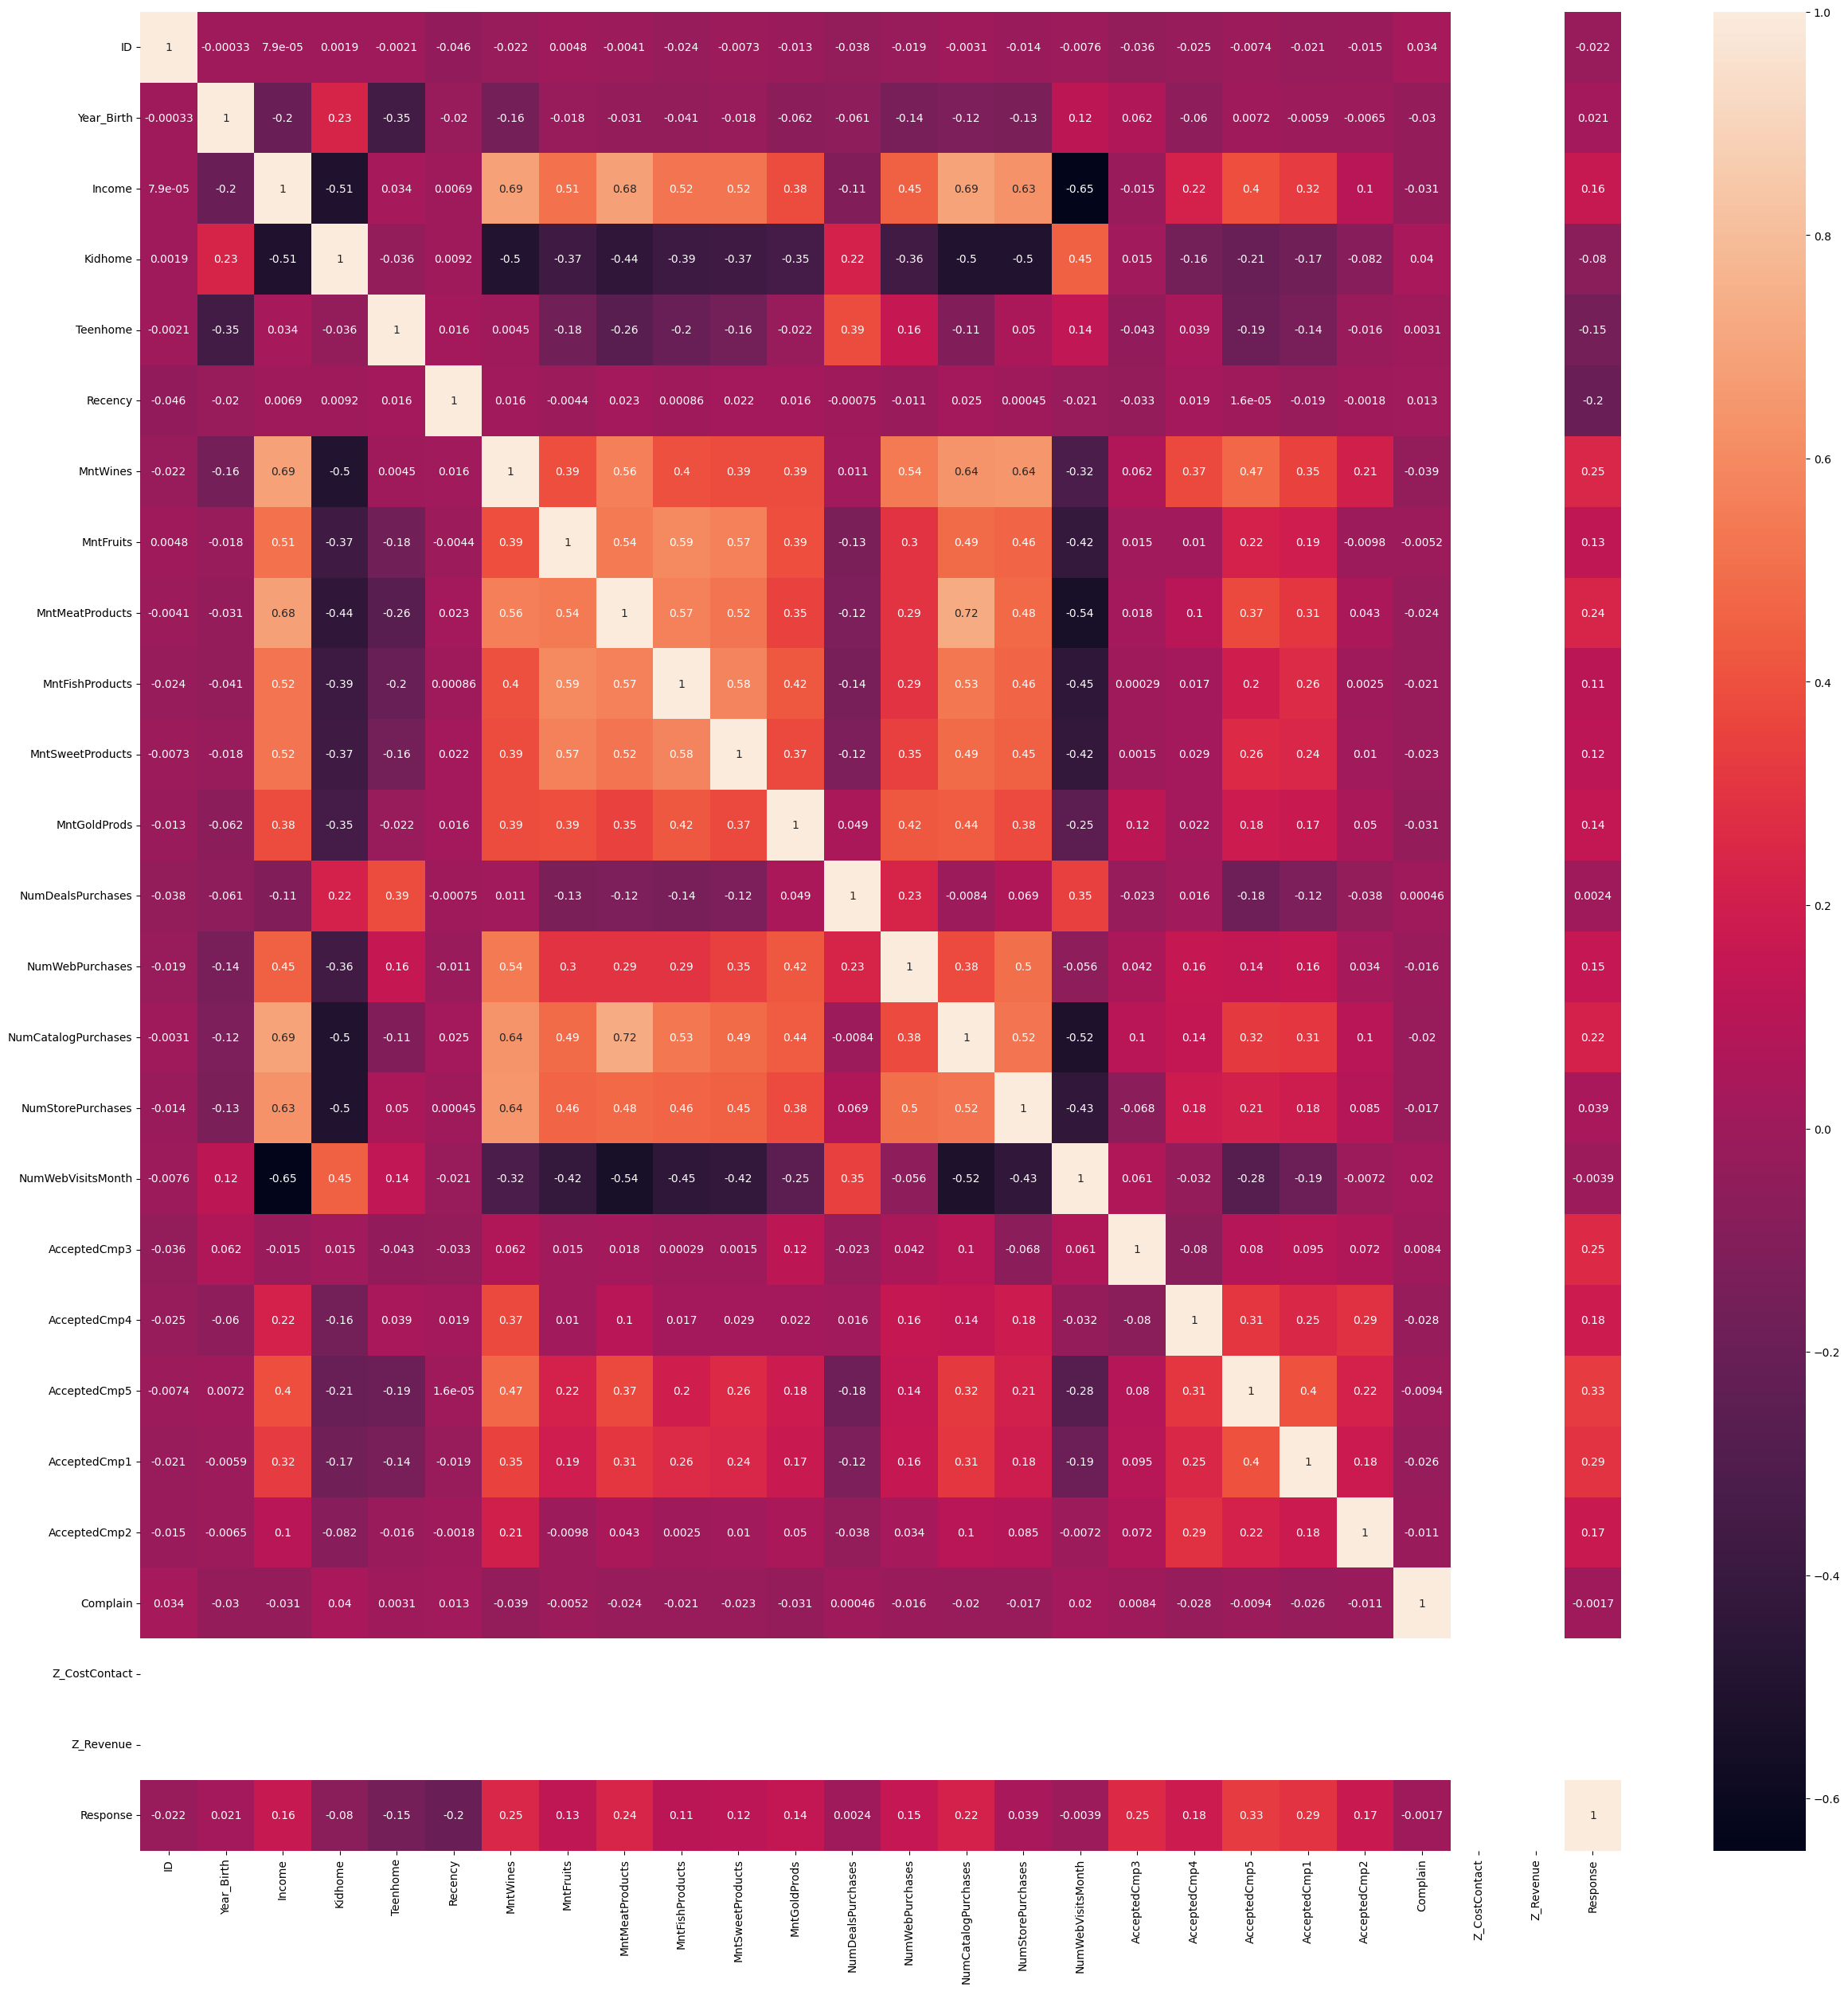

In [25]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)

plt.show()

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [26]:
specific_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_items_bought'] = df[specific_columns].sum(axis=1)

In [27]:
column_indices = [29, 4]
selected_columns = df.iloc[:, column_indices]
print(selected_columns)

      Total_items_bought   Income
0                   1617  58138.0
1                     27  46344.0
2                    776  71613.0
3                     53  26646.0
4                    422  58293.0
...                  ...      ...
2235                1341  61223.0
2236                 444  64014.0
2237                1241  56981.0
2238                 843  69245.0
2239                 172  52869.0

[2239 rows x 2 columns]


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df.iloc[:, [29, 4]].values

wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(x, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg) + '\n')

wcss score for n_cluster = 2 is [326802974578.2603]
silhoutte score for n_clusters = 2 is 0.5973307843107376

wcss score for n_cluster = 3 is [326802974578.2603, 183321764770.02783]
silhoutte score for n_clusters = 3 is 0.5444551526774024

wcss score for n_cluster = 4 is [326802974578.2603, 183321764770.02783, 124612839948.05916]
silhoutte score for n_clusters = 4 is 0.522606051078772

wcss score for n_cluster = 5 is [326802974578.2603, 183321764770.02783, 124612839948.05916, 82692064497.90123]
silhoutte score for n_clusters = 5 is 0.5373564296451561

wcss score for n_cluster = 6 is [326802974578.2603, 183321764770.02783, 124612839948.05916, 82692064497.90123, 53671262938.123474]
silhoutte score for n_clusters = 6 is 0.5417938592689435

wcss score for n_cluster = 7 is [326802974578.2603, 183321764770.02783, 124612839948.05916, 82692064497.90123, 53671262938.123474, 40851762280.83612]
silhoutte score for n_clusters = 7 is 0.5179409441657647



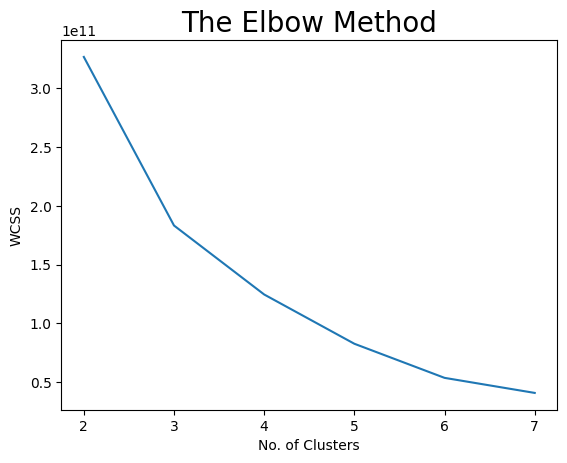

In [29]:
# Visualizing Elbow Method
plt.plot(range(2, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

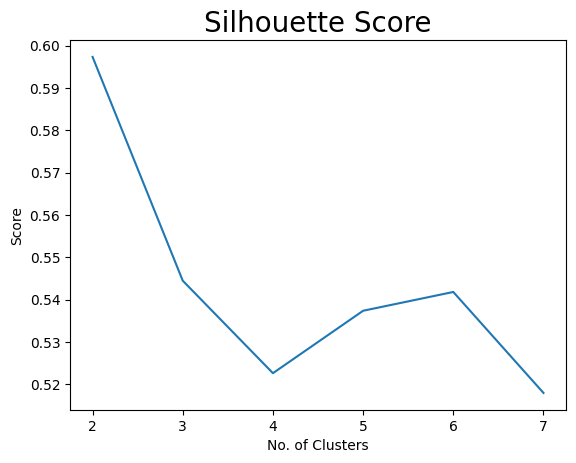

In [30]:
# Visualizing Silhouette Score
plt.plot(range(2, 8), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [31]:
kmeansmodel = KMeans(n_clusters =4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeansmodel.fit_predict(x)

df['Cluster']= y_kmeans

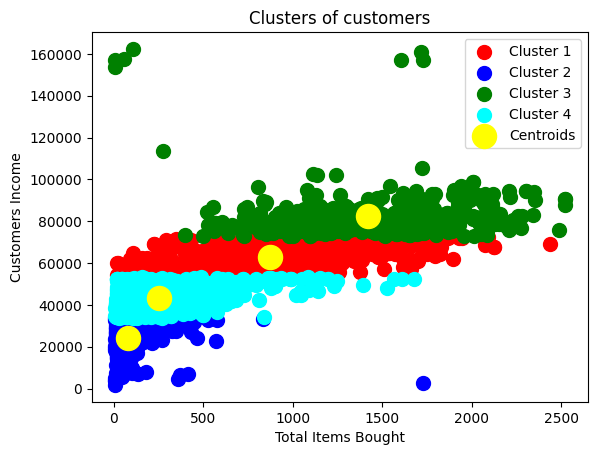

In [32]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Items Bought')
plt.ylabel('Customers Income')
plt.legend()
plt.show()

In [33]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame and 'Year_Birth' is the column containing birth years

# Get the current year
current_year = datetime.now().year

# Calculate age by subtracting birth year from current year
df['Age'] = current_year - df['Year_Birth']

# Display the DataFrame with the 'Age' column added
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  04-09-2012       58       635  ...             0   

In [34]:
average_age_by_cluster = df.groupby('Cluster')['Age'].mean().sort_values()
average_income_by_cluster = df.groupby('Cluster')['Income'].mean().sort_values()

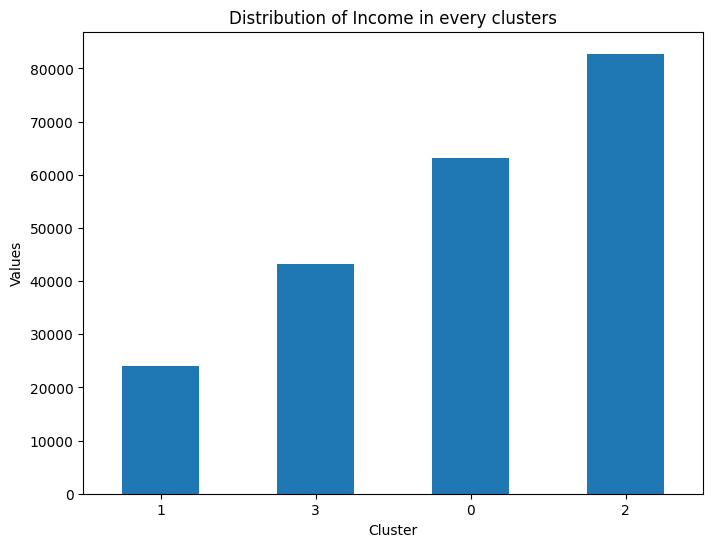

In [35]:
plt.figure(figsize=(8, 6))
average_income_by_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of Income in every clusters')
plt.xticks(rotation=0)
plt.show()

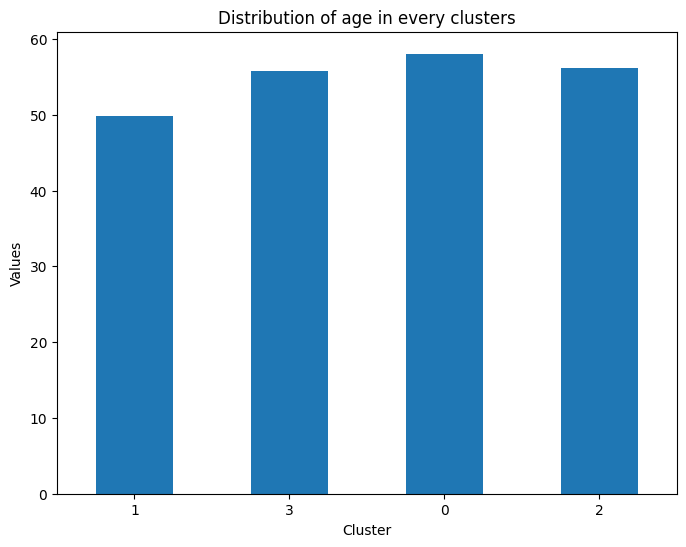

In [36]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
average_age_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of age in every clusters')
plt.xticks(rotation=0)
plt.show()

## Analysis Based On The Type Of Items Bought

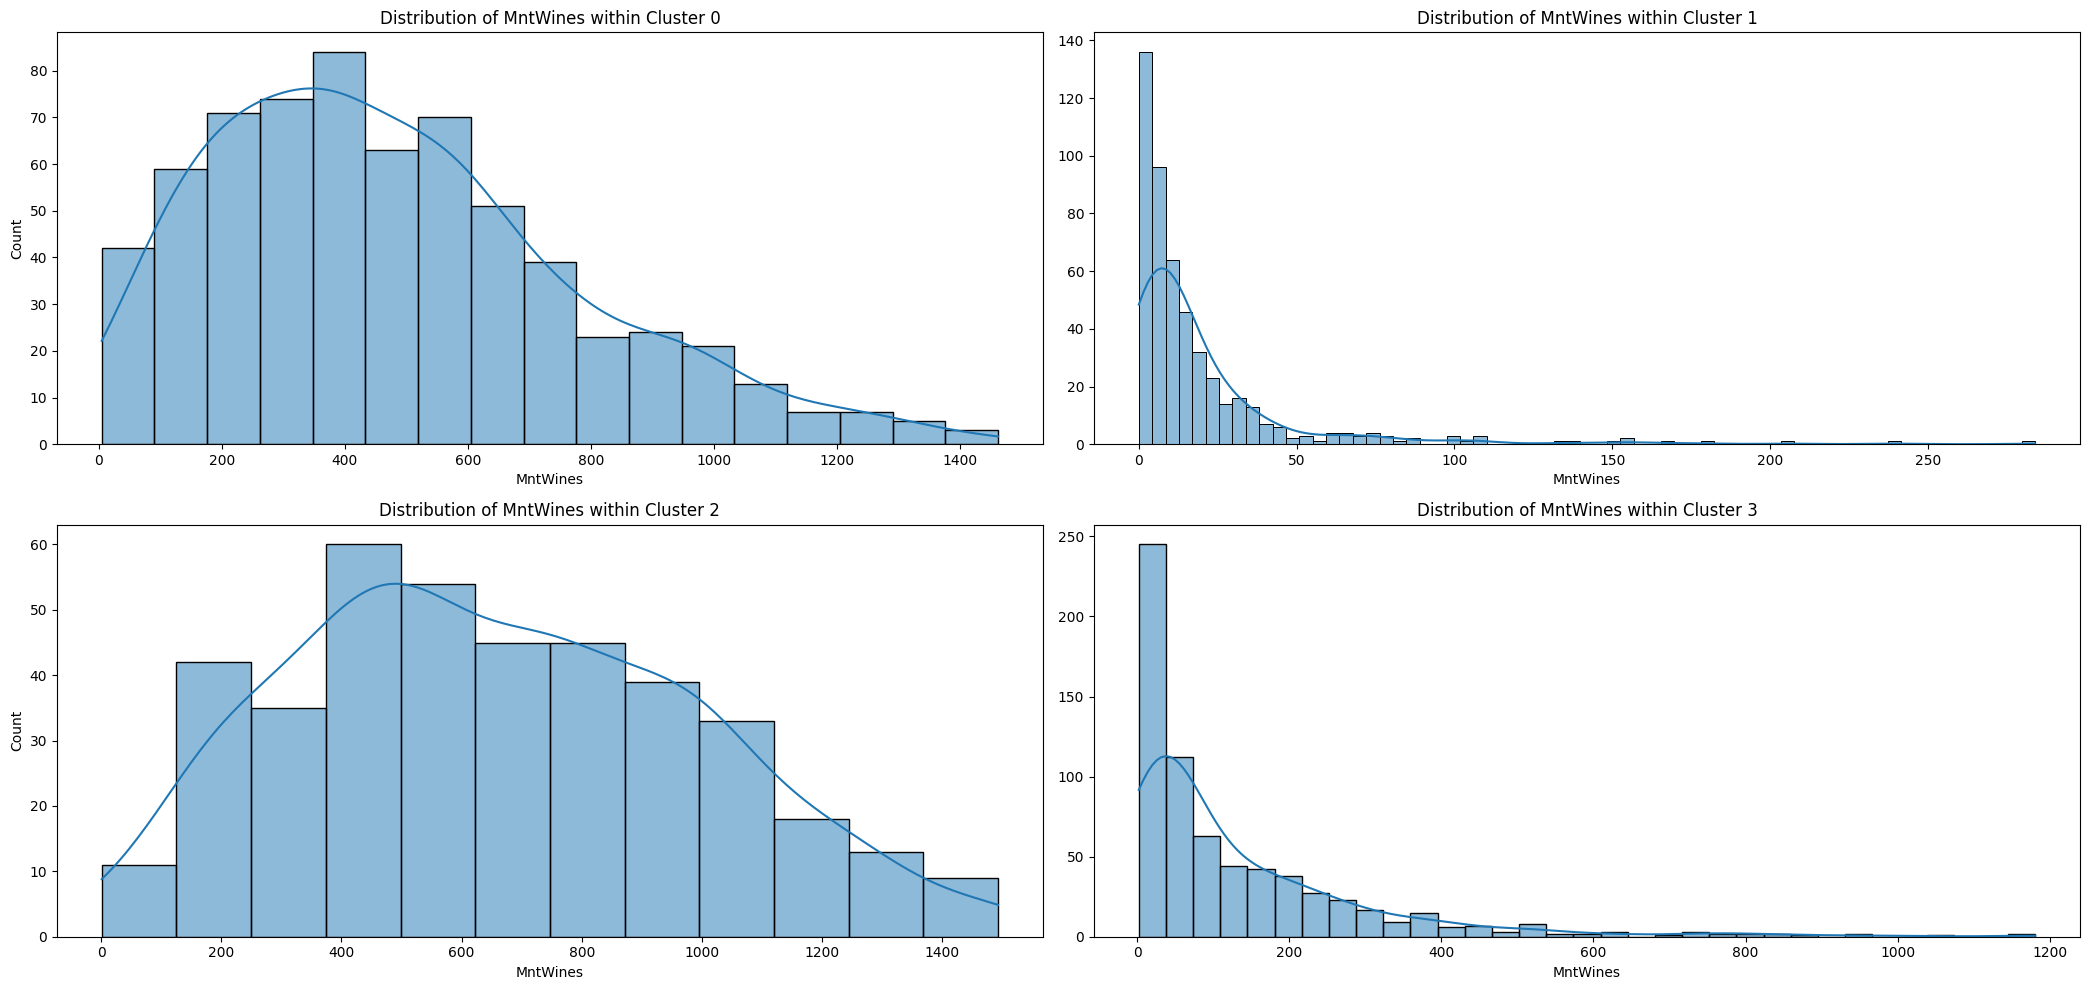

In [37]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntWines'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()



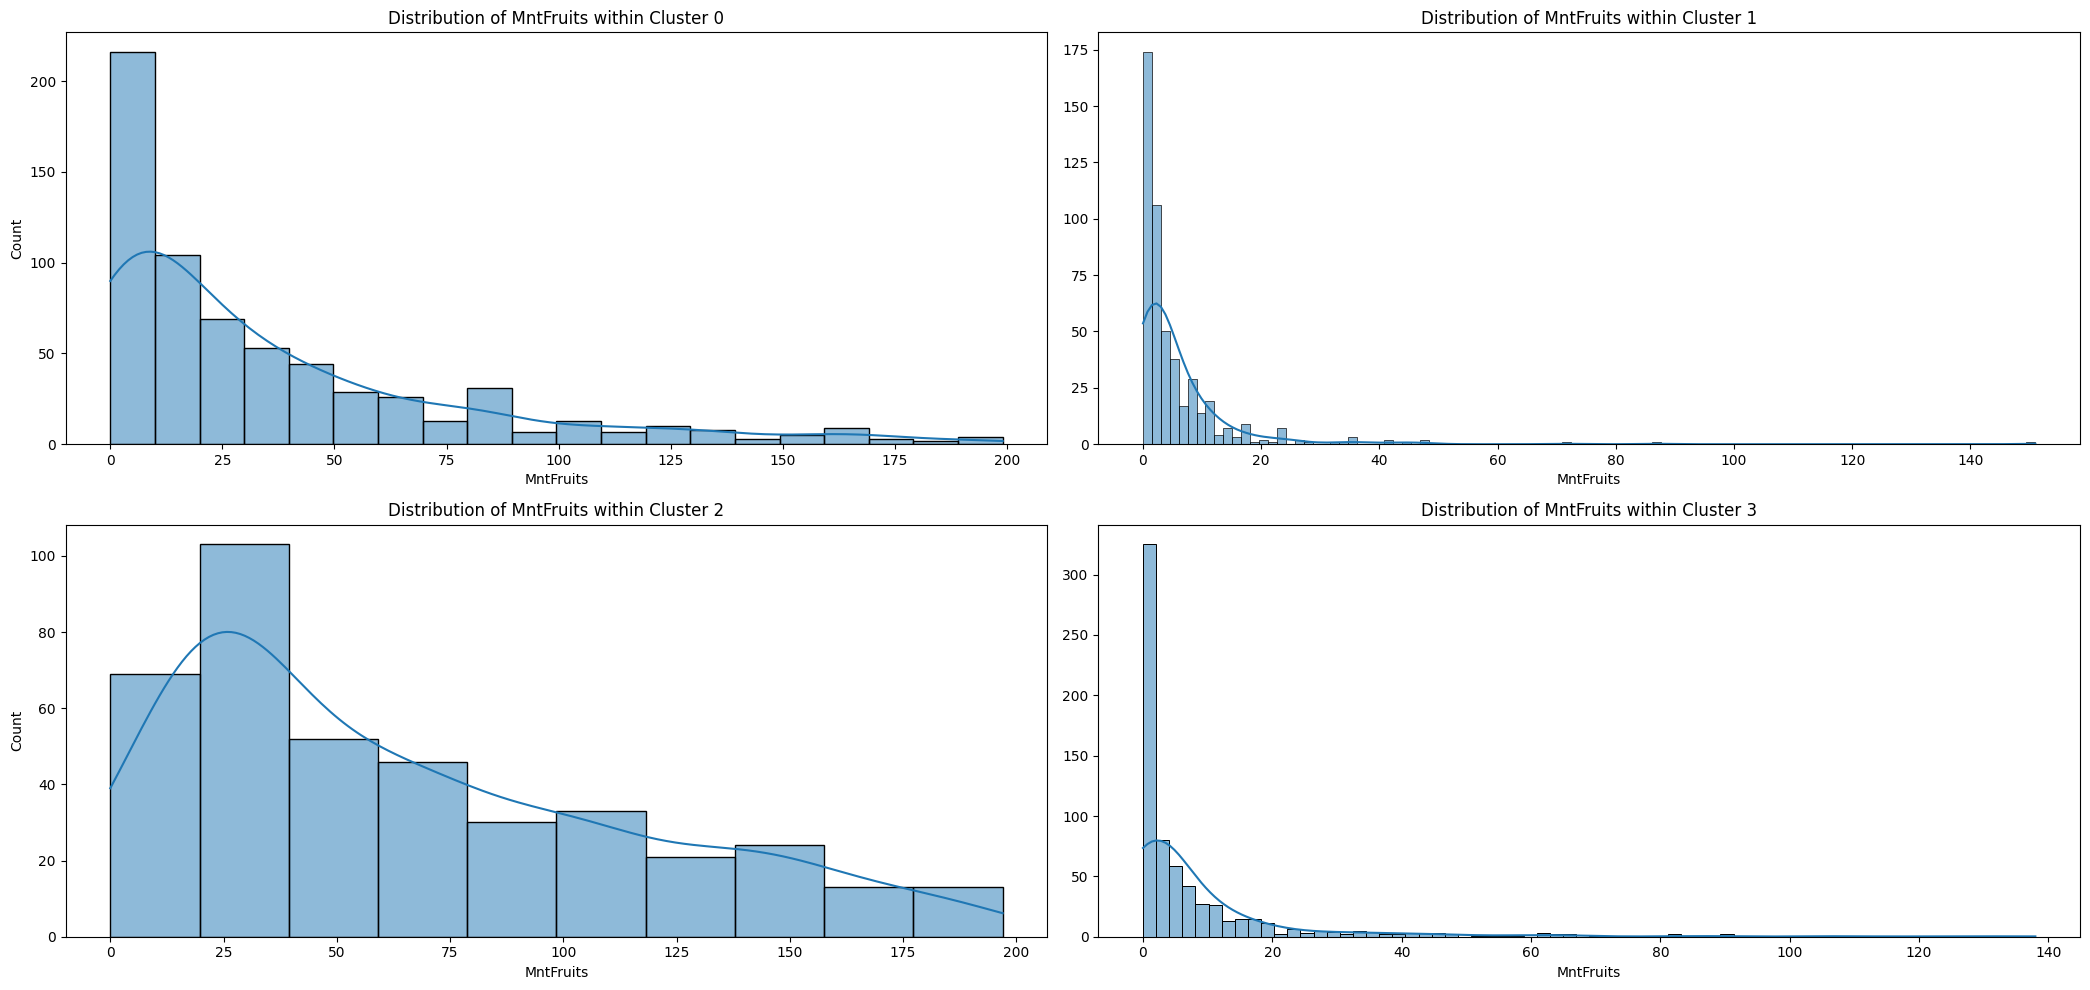

In [38]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntFruits'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()

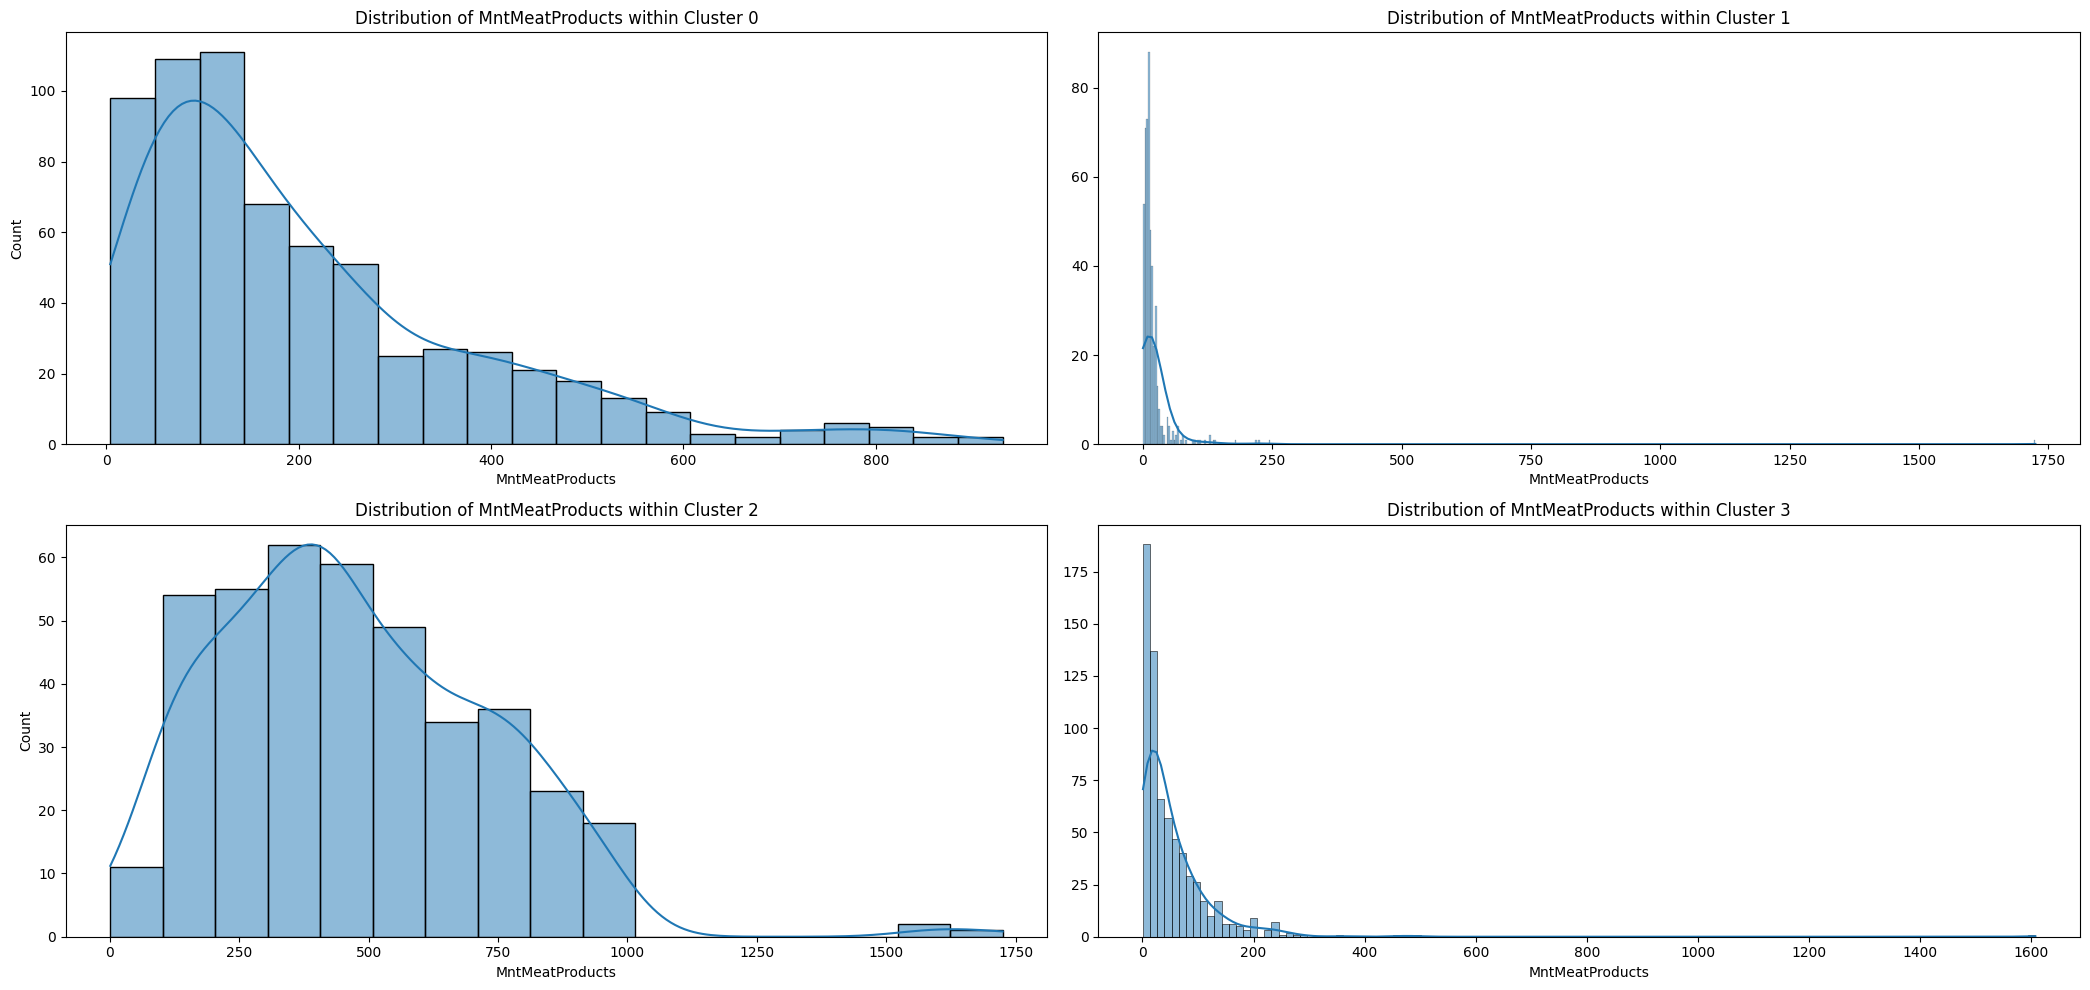

In [39]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntMeatProducts'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()


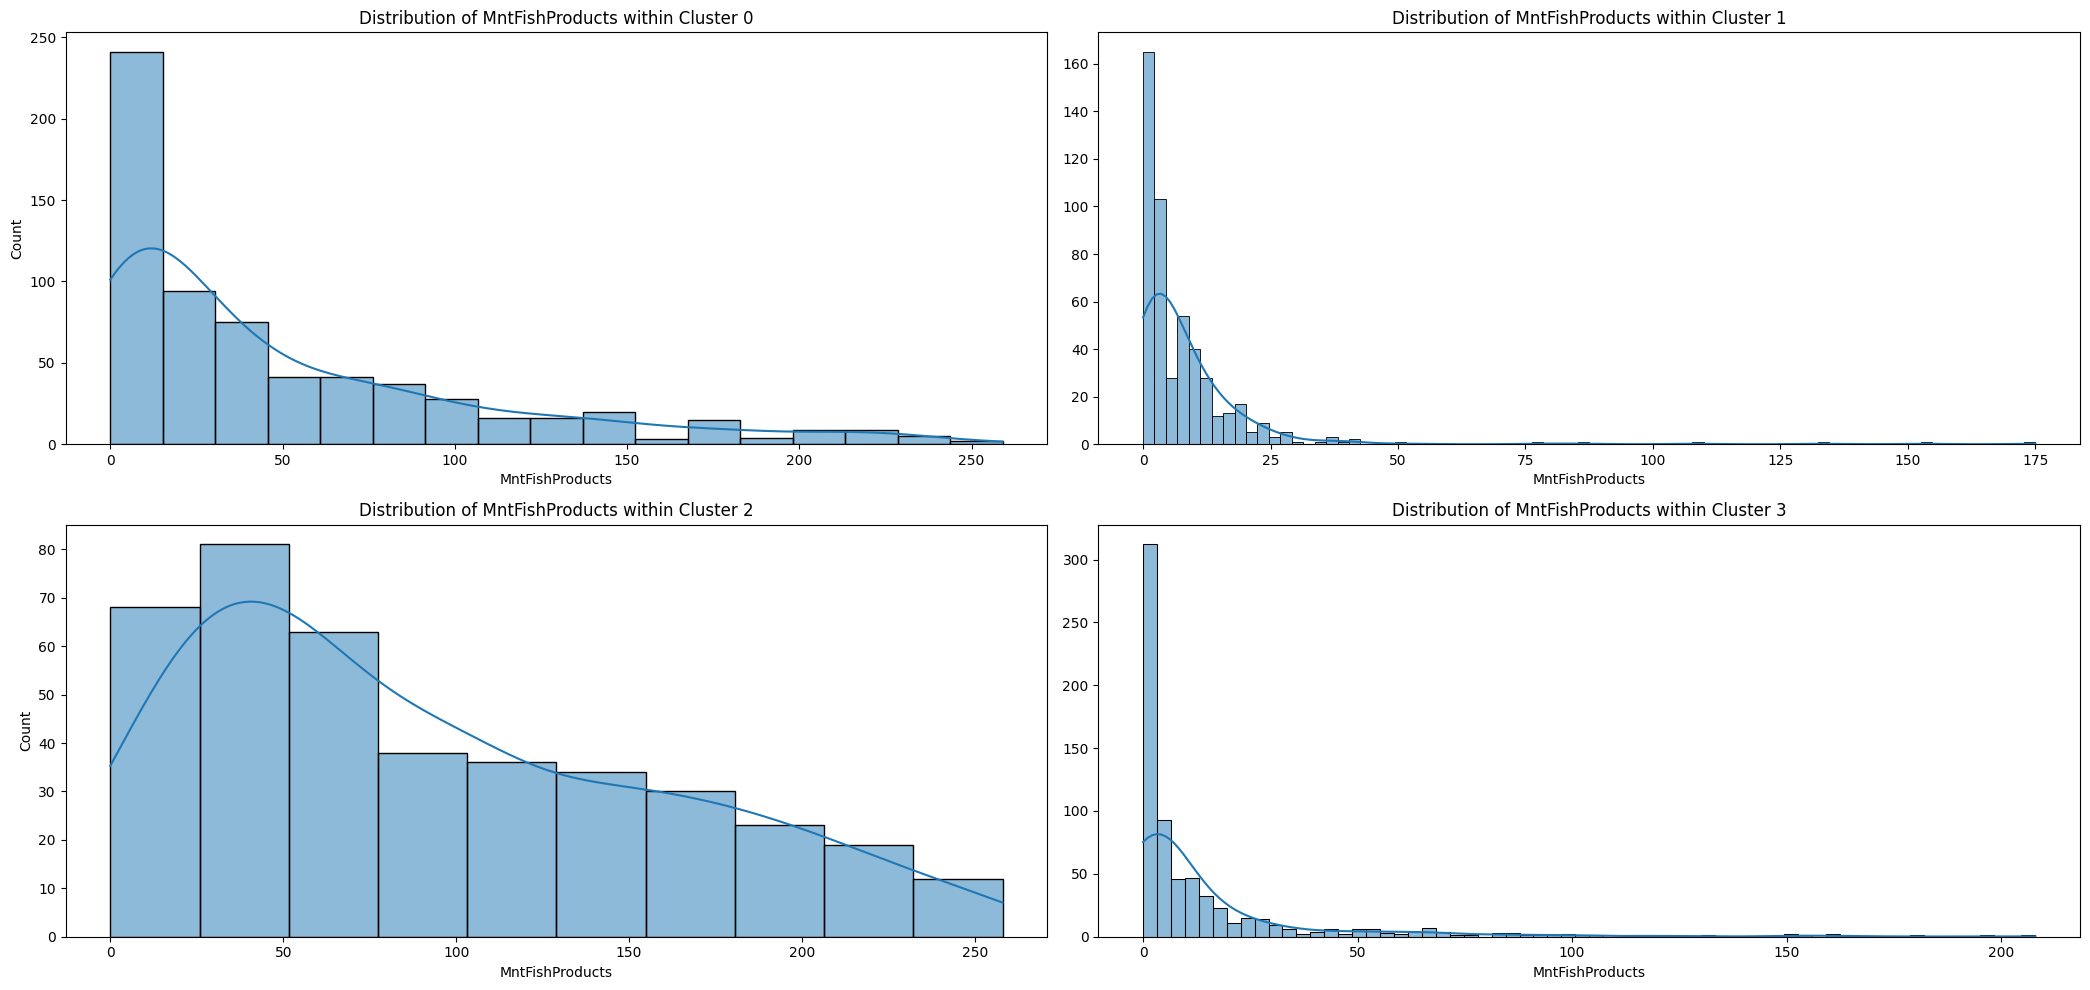

In [40]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntFishProducts'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()

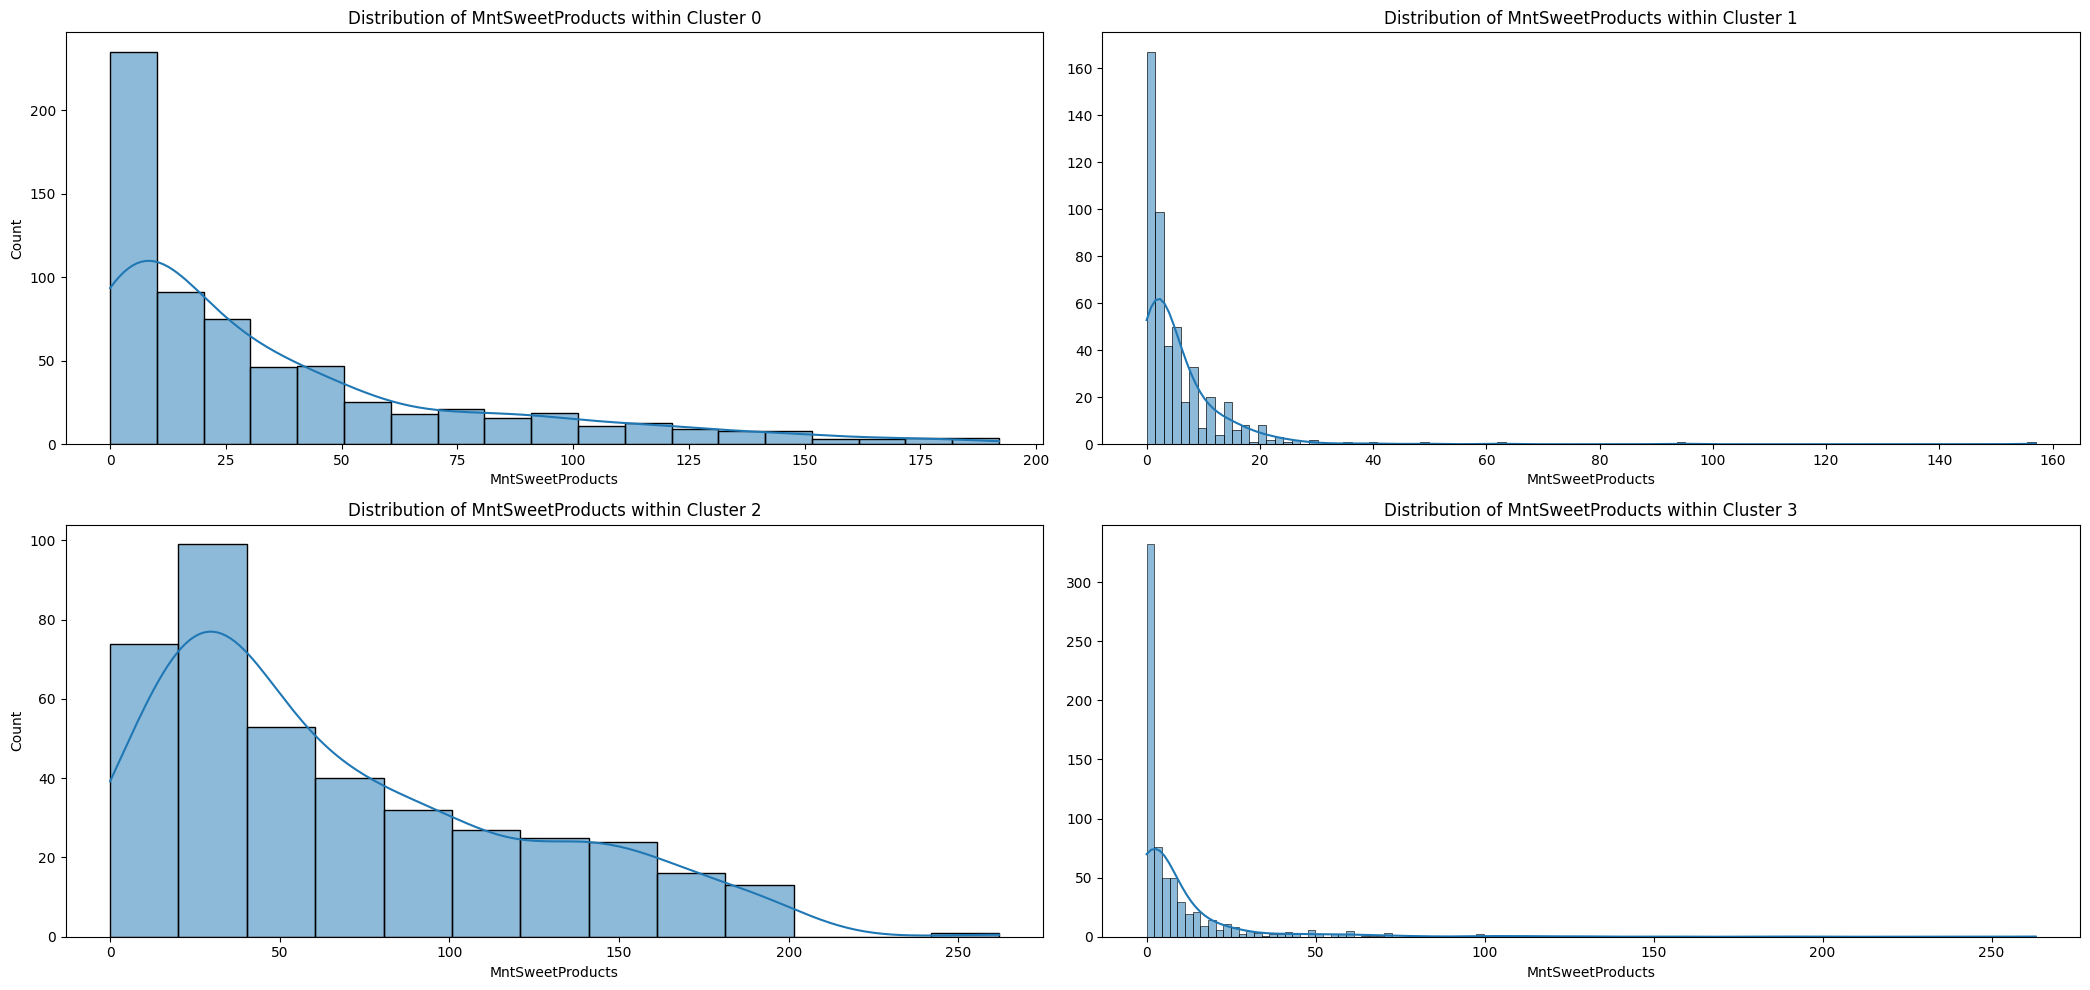

In [41]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntSweetProducts'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()

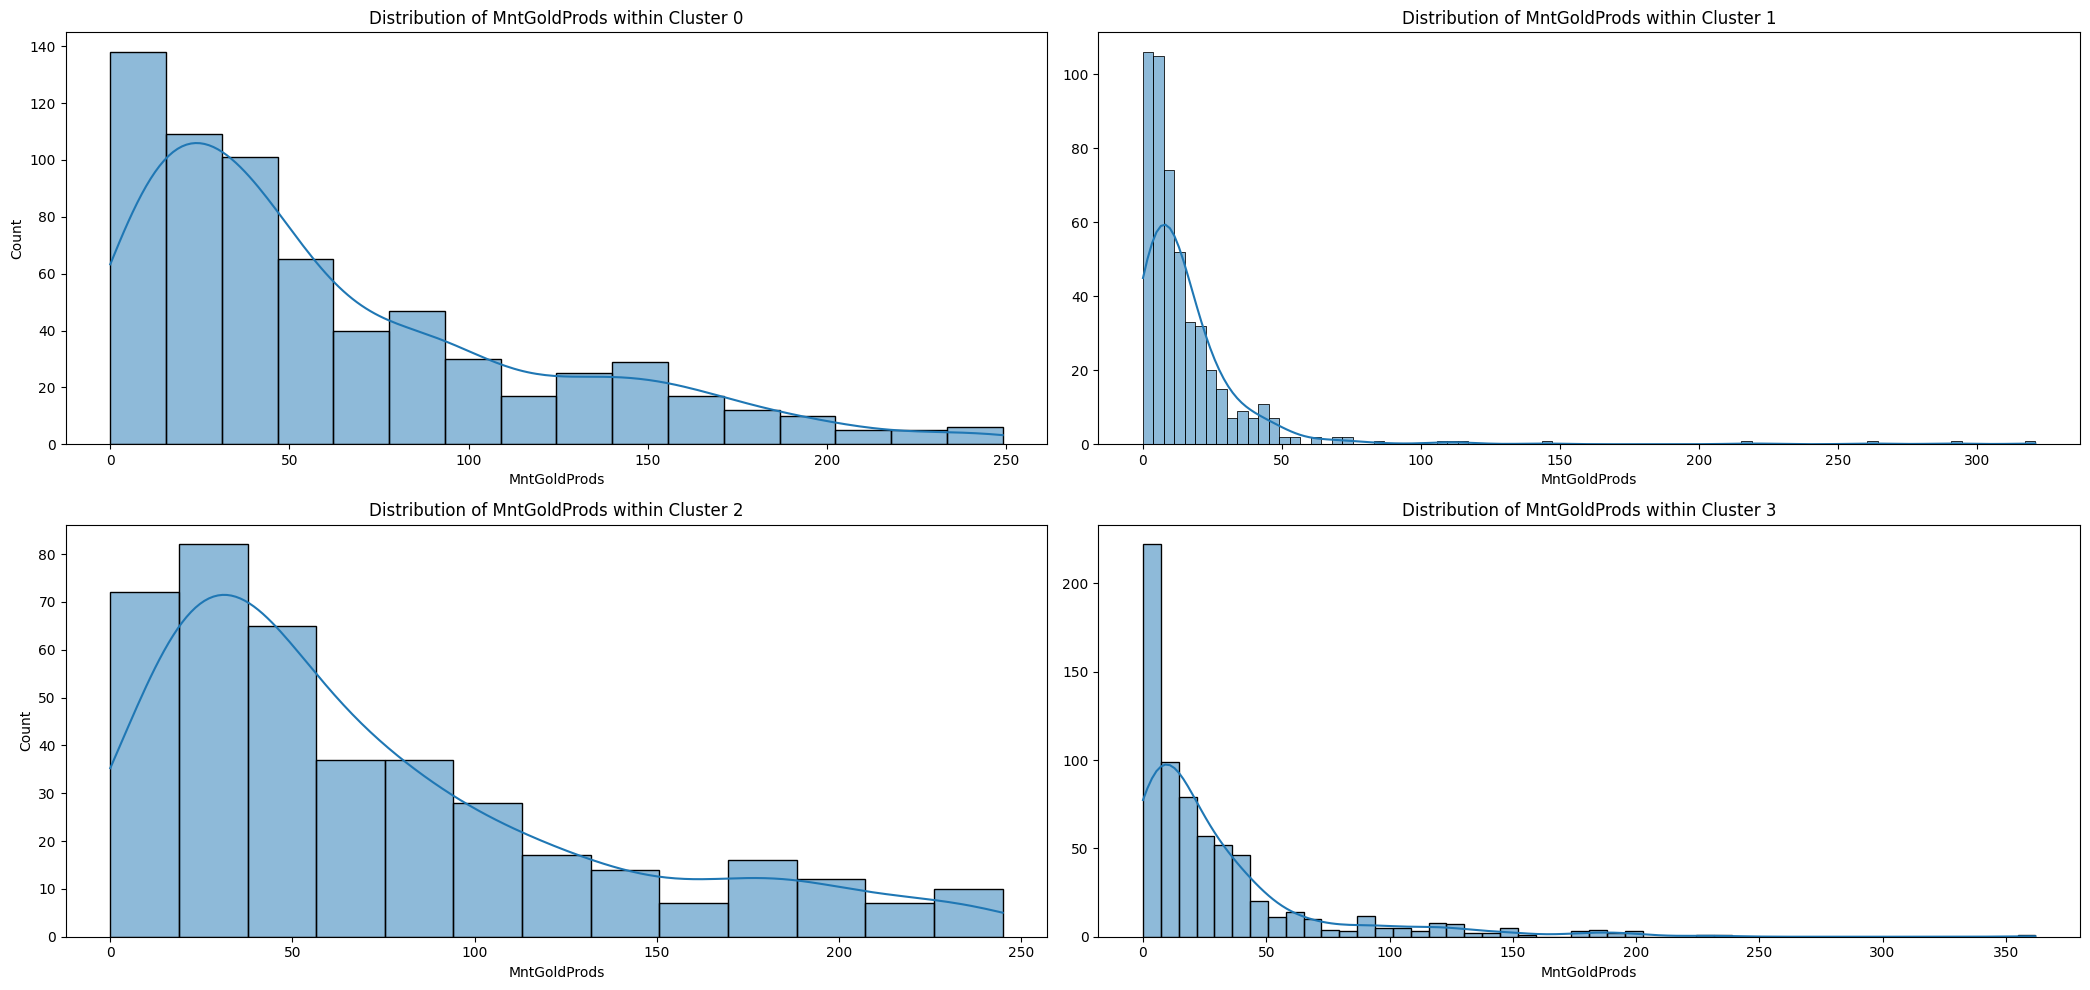

In [42]:
plt.figure(figsize=(21, 10))
n = 0
clusters = [0, 1, 2, 3]
column_to_plot = 'MntGoldProds'

for cluster in clusters:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(df[df['Cluster'] == cluster][column_to_plot], kde=True)
    plt.ylabel('Count' if n in [1, 3] else '')
    plt.title(f'Distribution of {column_to_plot} within Cluster {cluster}')

plt.tight_layout()
plt.show()

In [43]:
gold_ammount_by_cluster = df.groupby('Cluster')['MntGoldProds'].sum()
wines_ammount_by_cluster = df.groupby('Cluster')['MntWines'].sum()
fish_ammount_by_cluster = df.groupby('Cluster')['MntFishProducts'].sum()
meat_ammount_by_cluster = df.groupby('Cluster')['MntMeatProducts'].sum()
sweet_ammount_by_cluster = df.groupby('Cluster')['MntSweetProducts'].sum()
fruits_ammount_by_cluster = df.groupby('Cluster')['MntFruits'].sum()


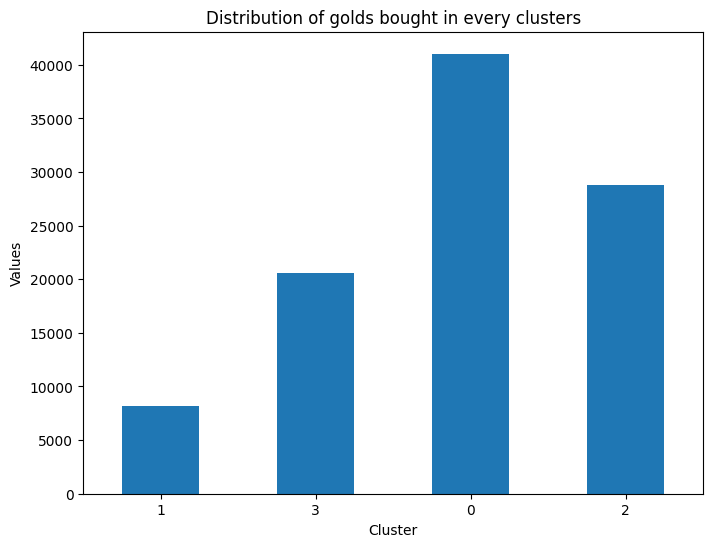

In [44]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
gold_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of golds bought in every clusters')
plt.xticks(rotation=0)
plt.show()

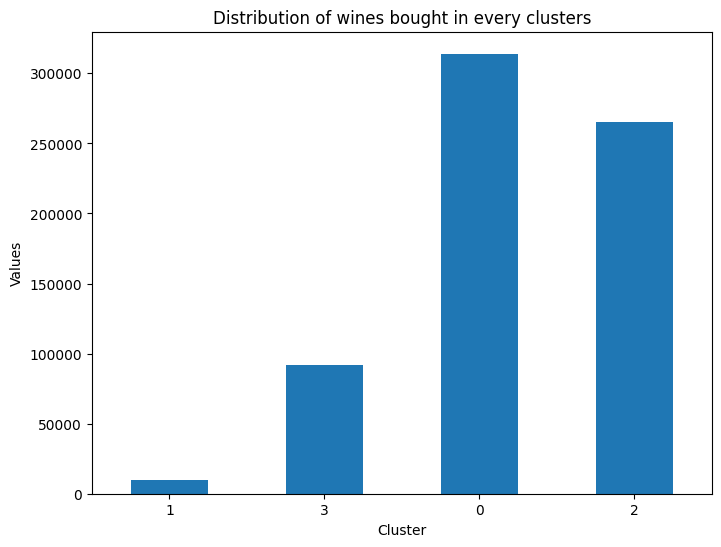

In [45]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
wines_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of wines bought in every clusters')
plt.xticks(rotation=0)
plt.show()

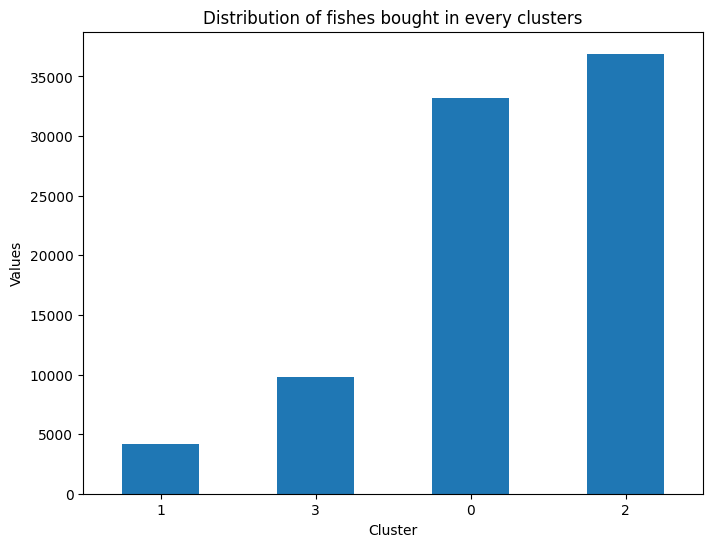

In [46]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
fish_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of fishes bought in every clusters')
plt.xticks(rotation=0)
plt.show()

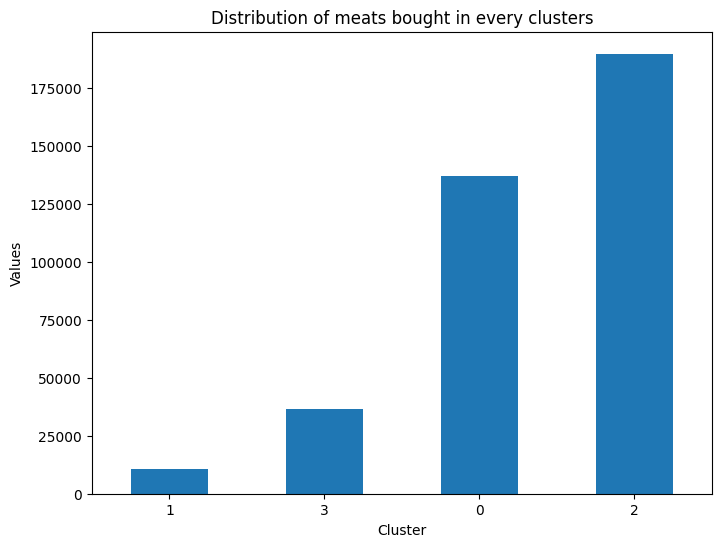

In [47]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
meat_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of meats bought in every clusters')
plt.xticks(rotation=0)
plt.show()

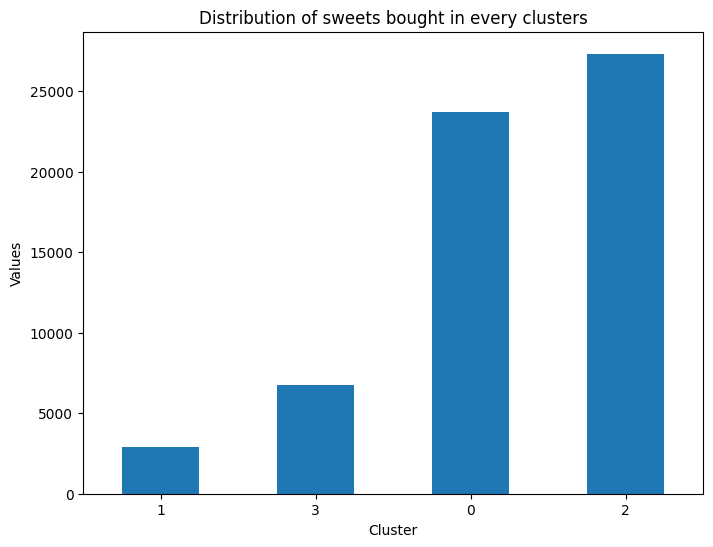

In [48]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
sweet_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of sweets bought in every clusters')
plt.xticks(rotation=0)
plt.show()

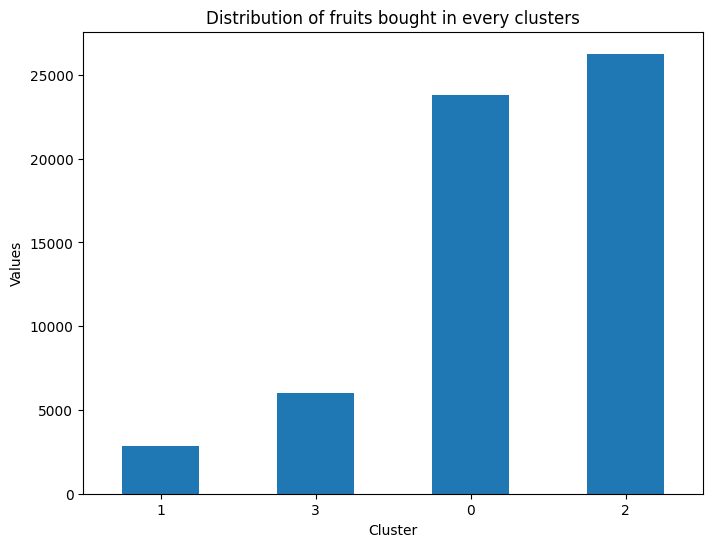

In [49]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
fruits_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of fruits bought in every clusters')
plt.xticks(rotation=0)
plt.show()

# Analysis Based Of The People

In [50]:
kids_ammount_by_cluster = df.groupby('Cluster')['Kidhome'].value_counts().unstack()
teen_ammount_by_cluster = df.groupby('Cluster')['Teenhome'].value_counts().unstack()
recency_ammount_by_cluster = df.groupby('Cluster')['Recency'].mean()
complains_ammount_by_cluster = df.groupby('Cluster')['Complain'].value_counts().unstack()

print(recency_ammount_by_cluster)

Cluster
0    48.330793
1    47.921529
2    49.754950
3    50.379765
Name: Recency, dtype: float64


<Figure size 800x600 with 0 Axes>

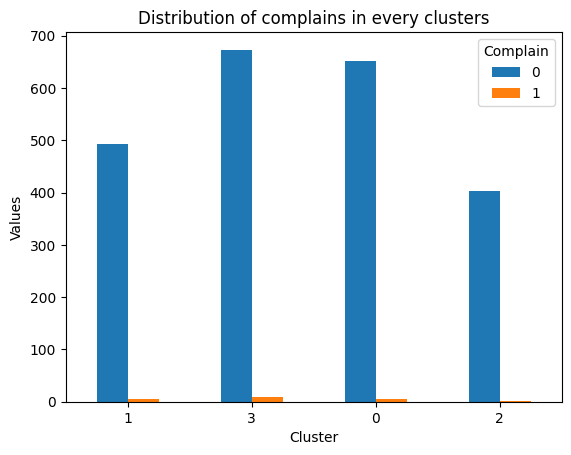

In [51]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
complains_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of complains in every clusters')
plt.xticks(rotation=0)
plt.show()

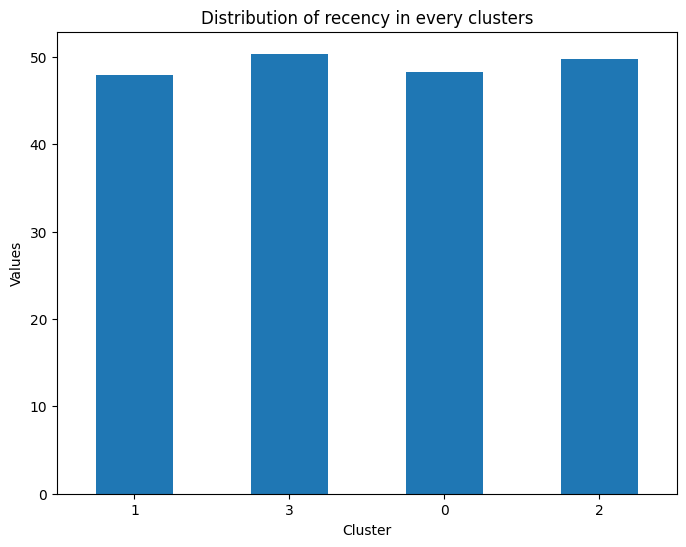

In [52]:
desired_order = [1, 3, 0, 2]

plt.figure(figsize=(8, 6))
recency_ammount_by_cluster.reindex(desired_order).plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Distribution of recency in every clusters')
plt.xticks(rotation=0)
plt.show()

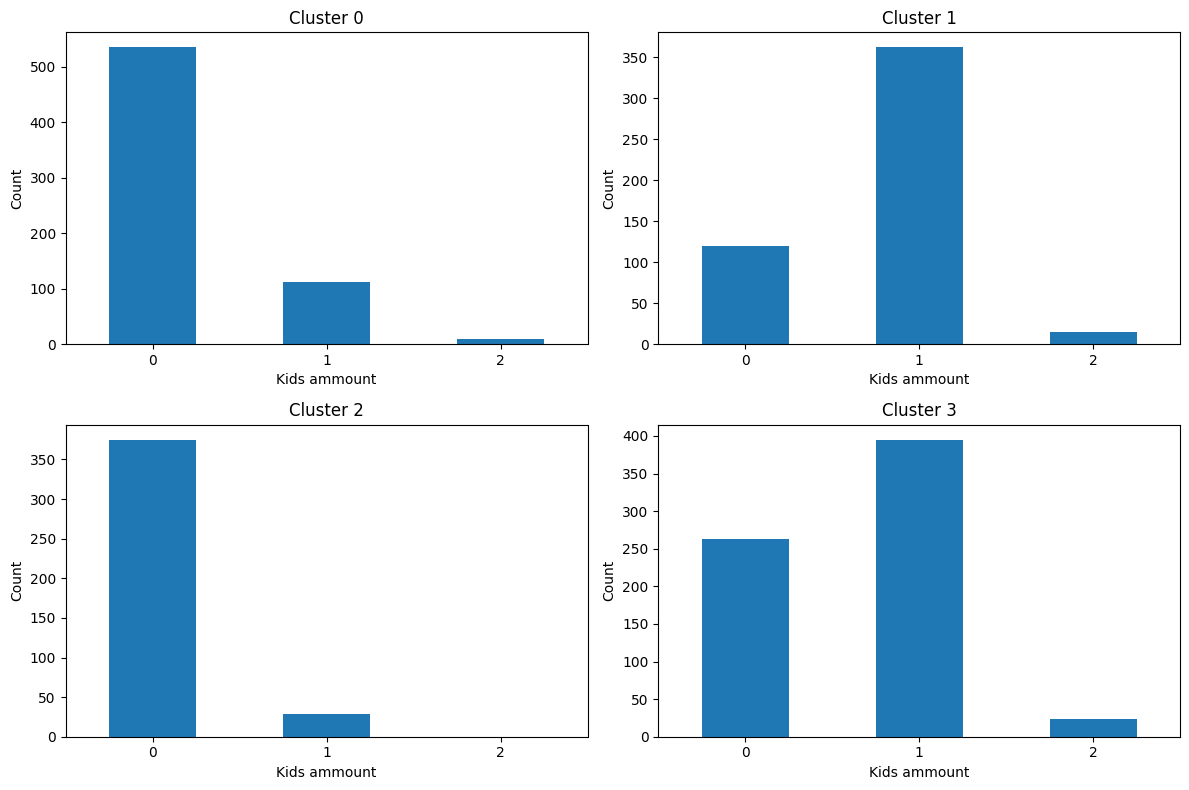

In [53]:
plt.figure(figsize=(12, 8))

# Iterate over each cluster and plot a bar plot
for i, cluster in enumerate(kids_ammount_by_cluster.index):
    plt.subplot(2, 2, i+1)
    kids_ammount_by_cluster.loc[cluster].plot(kind='bar')
    plt.xlabel('Kids ammount')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster}')
    plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

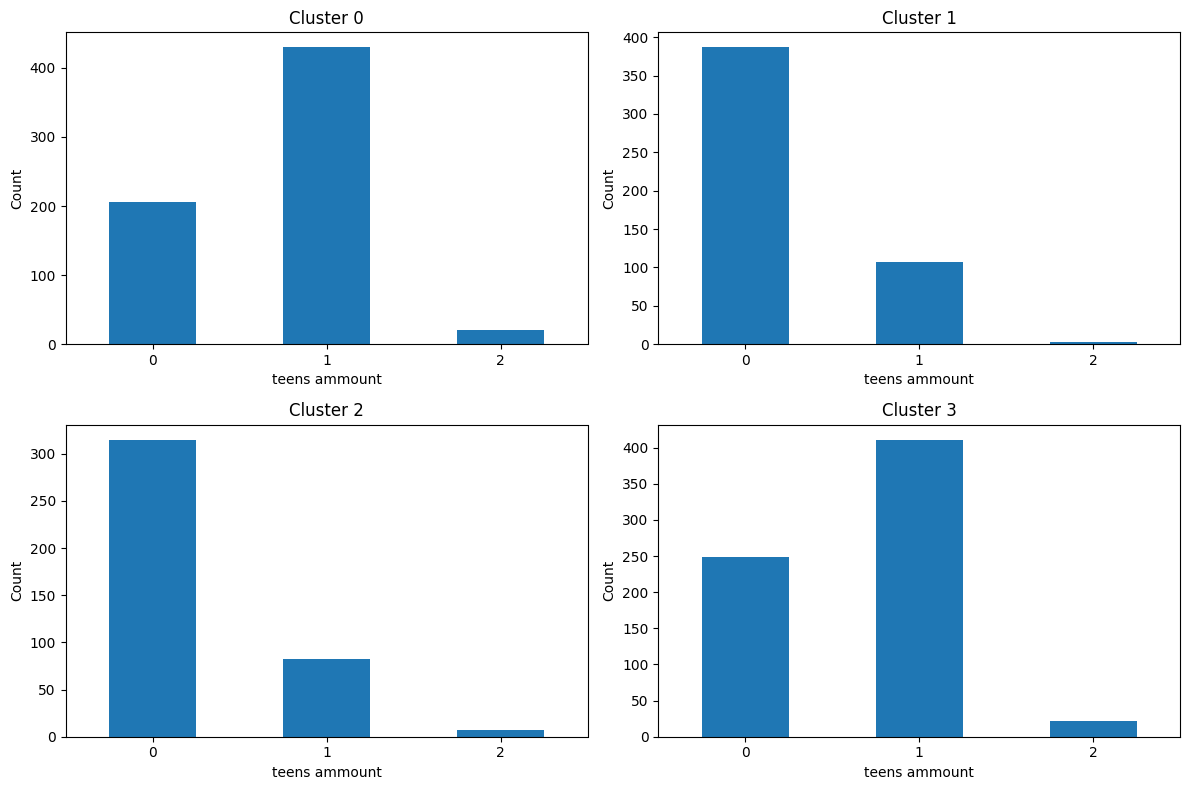

In [54]:
plt.figure(figsize=(12, 8))

# Iterate over each cluster and plot a bar plot
for i, cluster in enumerate(teen_ammount_by_cluster.index):
    plt.subplot(2, 2, i+1)
    teen_ammount_by_cluster.loc[cluster].plot(kind='bar')
    plt.xlabel('teens ammount')
    plt.ylabel('Count')
    plt.title(f'Cluster {cluster}')
    plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

Kesimpulan
1. Dapat diketahui berdasarkan pembagian cluster, Cluster 0 yang memiliki penghasilan di rata-rata kedua tertinggi memiliki jumlah pembelian tertinggi pada Gold, dan Wines
2. Cluster dengan nilai rata-rata penghasilan tertinggi memiliki jumlah pembelian tertinggi pada Fish, Meat, Sweet, dan Fruits
3. Cluster dengan jumlah complain terbanyak adalah cluster nomor 3
4. Pada cluster 0, orang-orangnya memliki kebiasaan untuk pergi ke toko per 48 hari, Cluster 1 memiliki kebiasaan pergi per 47 hari, Cluster 2 memiliki kebiasaan pergi per 49 hari, dan cluster 3 memilki kebiasaan pergi per 50 hari.
5. Pada cluster 0 dan 2, kebanyakan tidak memiliki anak, Cluster 1 dan 3 kebanyakan memiliki 1 anak.
6. Pada cluster 0 dan 3 rata rata memiliki 1 remaja, dan cluster 1 dan 2 memiliki 0 remaja.